In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_dir = r"E:\AI\Covid19-dataset\train"
test_dir = r"E:\AI\Covid19-dataset\test"

In [3]:
img_width, img_height = 512, 512

In [4]:
batch_size = 32

In [5]:
train_dataset = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [6]:
test_dataset = ImageDataGenerator(rescale=1./255)

In [7]:
X_train = train_dataset.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 251 images belonging to 3 classes.


In [8]:
X_test = test_dataset.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 58 images belonging to 3 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(3, activation="softmax")
])

In [10]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
history = model.fit(X_train, epochs=30, validation_data=X_test)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 392s 47s/step - accuracy: 0.3404 - loss: 2.7590 - val_accuracy: 0.5690 - val_loss: 1.1007
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 365s 42s/step - accuracy: 0.5953 - loss: 1.0201 - val_accuracy: 0.2931 - val_loss: 1.4301
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 359s 42s/step - accuracy: 0.6341 - loss: 0.8095 - val_accuracy: 0.5345 - val_loss: 1.7386
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 302s 35s/step - accuracy: 0.7198 - loss: 0.6022 - val_accuracy: 0.6897 - val_loss: 1.4528
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 299s 35s/step - accuracy: 0.6809 - loss: 0.9083 - val_accuracy: 0.5517 - val_loss: 1.0567
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 268s 31s/step - accuracy: 0.7024 - loss: 0.6853 - val_accuracy: 0.6034 - val_loss: 1.0513
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 301s 38s/step - accuracy: 0.7233 - loss: 0.6369 - val_accuracy: 0.5345 - val_loss: 1.2373
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 285s 32s/step - accuracy: 0.7871 - loss: 0.5309 - val_accuracy: 0.5690 - val_loss:

In [12]:
import matplotlib.pyplot as plt

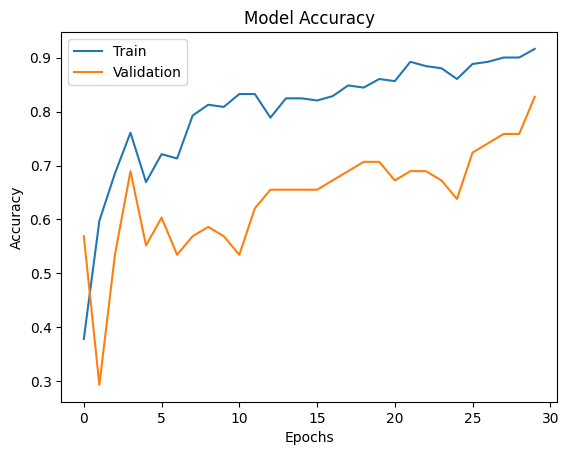

In [13]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

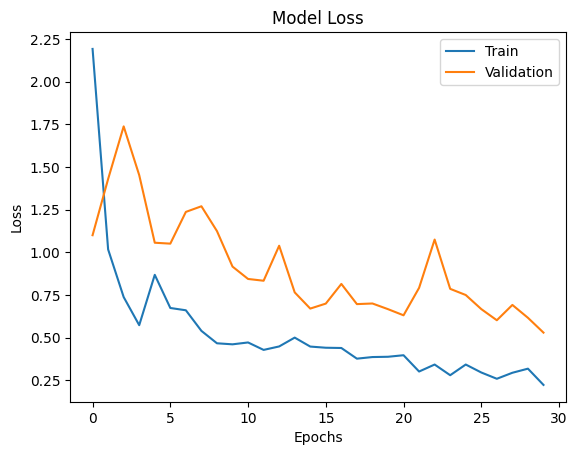

In [14]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

In [15]:
class_labels = X_train.class_indices

In [16]:
class_names = {value: key for key, value in class_labels.items()}
print("Class Names:", class_names)

Class Names: {0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}


In [17]:
from tensorflow.keras.preprocessing import image

In [18]:
img_path = r"E:\AI\Covid19-dataset\test\Covid\radiopaedia-2019-novel-coronavirus-infected-pneumonia.jpg"

In [19]:
img = image.load_img(img_path, target_size=(img_width, img_height))

In [20]:
img_arr = image.img_to_array(img)

In [21]:
img_arr = np.expand_dims(img_arr, axis=0)

In [22]:
img_arr = img_arr / 255.0

In [23]:
pred = model.predict(img_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


In [24]:
pred_class = np.argmax(pred)

In [25]:
class_names[pred_class]

'Covid'